Hello everyone,

In this module, it is required to implement the preprocessor.

At first, what are the main steps that we should go through in this module?


# TODOs:

1. Understand the problem
2. ..

In [17]:
##################################################### imports #####################################################
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# 1. Understand the problem

- Input: --
- Output: --

# 2. Read the data

Import it using pandas:

In [3]:
def read_data(dataset_path='./../data/heart_2020_cleaned.csv', debug=False):
    """ read the dataset from a given path

    Args:
        dataset_path: the path of the dataset directory
        debug: print debug data (default False)
    Returns:
    """
    dataset = pd.read_csv(dataset_path)
    labels = np.array(dataset['HeartDisease'])
    data = dataset.drop('HeartDisease', axis=1)

    # Encode Yes: 1 - No: 1
    labels[labels=='Yes'] = 1
    labels[labels=='No'] = 0

    if debug:
        yes_count, no_count = len(labels[labels==1]), len(labels[labels==0])
        total_size = len(labels)

        print(f'total data samples: {total_size} ({total_size/total_size * 100}%)')
        print(f'yes samples: {yes_count} ({round(yes_count/total_size, 1) * 100}%)')
        print(f'no samples: {no_count} ({round(no_count/total_size, 1) * 100}%)')


    return data, labels
            

In [23]:
len(df.columns)

17

In [22]:
df, labels = read_data(debug=True)

total data samples: 319795 (100.0%)
yes samples: 27373 (10.0%)
no samples: 292422 (90.0%)



# 3. Explore the data and get insights

Exploring the data specially via visualization helps to understand it better, know variables and how they may affect each others.

### As a start, let's see sample of the training data

In [5]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Race              319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  SkinCancer        31

In [8]:
def encode_GenHealth(df):
    
    encoded_df = df.copy()

    encoded_df['GenHealth'].unique()
    dict_GenHealth = {
        'Poor': 0,
        'Fair': 1,
        'Good': 2,
        'Very good': 3,
        'Excellent': 4
    }

    encoded_df['GenHealth'].replace(dict_GenHealth, inplace=True)

    return encoded_df

def categorize_age(age):
    ages = [i for i in range(80, 20, -5)]
    groups = [i for i in range(len(ages), -1, -1)]
    for i in range(len(ages)):
        if age >= ages[i]:
            return groups[i]
    return groups[-1]

def encode_AgeCategory(df):
    encoded_age = df.copy()    
    age_list = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',  '70-74','75-79', '80 or older']
    age_groups = [i for i in range(len(age_list))]

    encoded_age.replace(to_replace=age_list, value=age_groups, inplace=True)

    return encoded_age



In [9]:
def encode_categorical_data(df):
    category_columns = [
        'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic',
        'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'
        ]

    encoded_df = encode_GenHealth(pd.get_dummies(df, columns=category_columns, drop_first=True))
    encoded_df = encode_AgeCategory(encoded_df)
    return encoded_df

In [12]:
encoded_data = encode_categorical_data(df)
encoded_data.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,3,5.0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,1
1,20.34,0.0,0.0,12,3,7.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,9,1,8.0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
3,24.21,0.0,0.0,11,2,6.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23.71,28.0,0.0,4,3,8.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [13]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [14]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [15]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

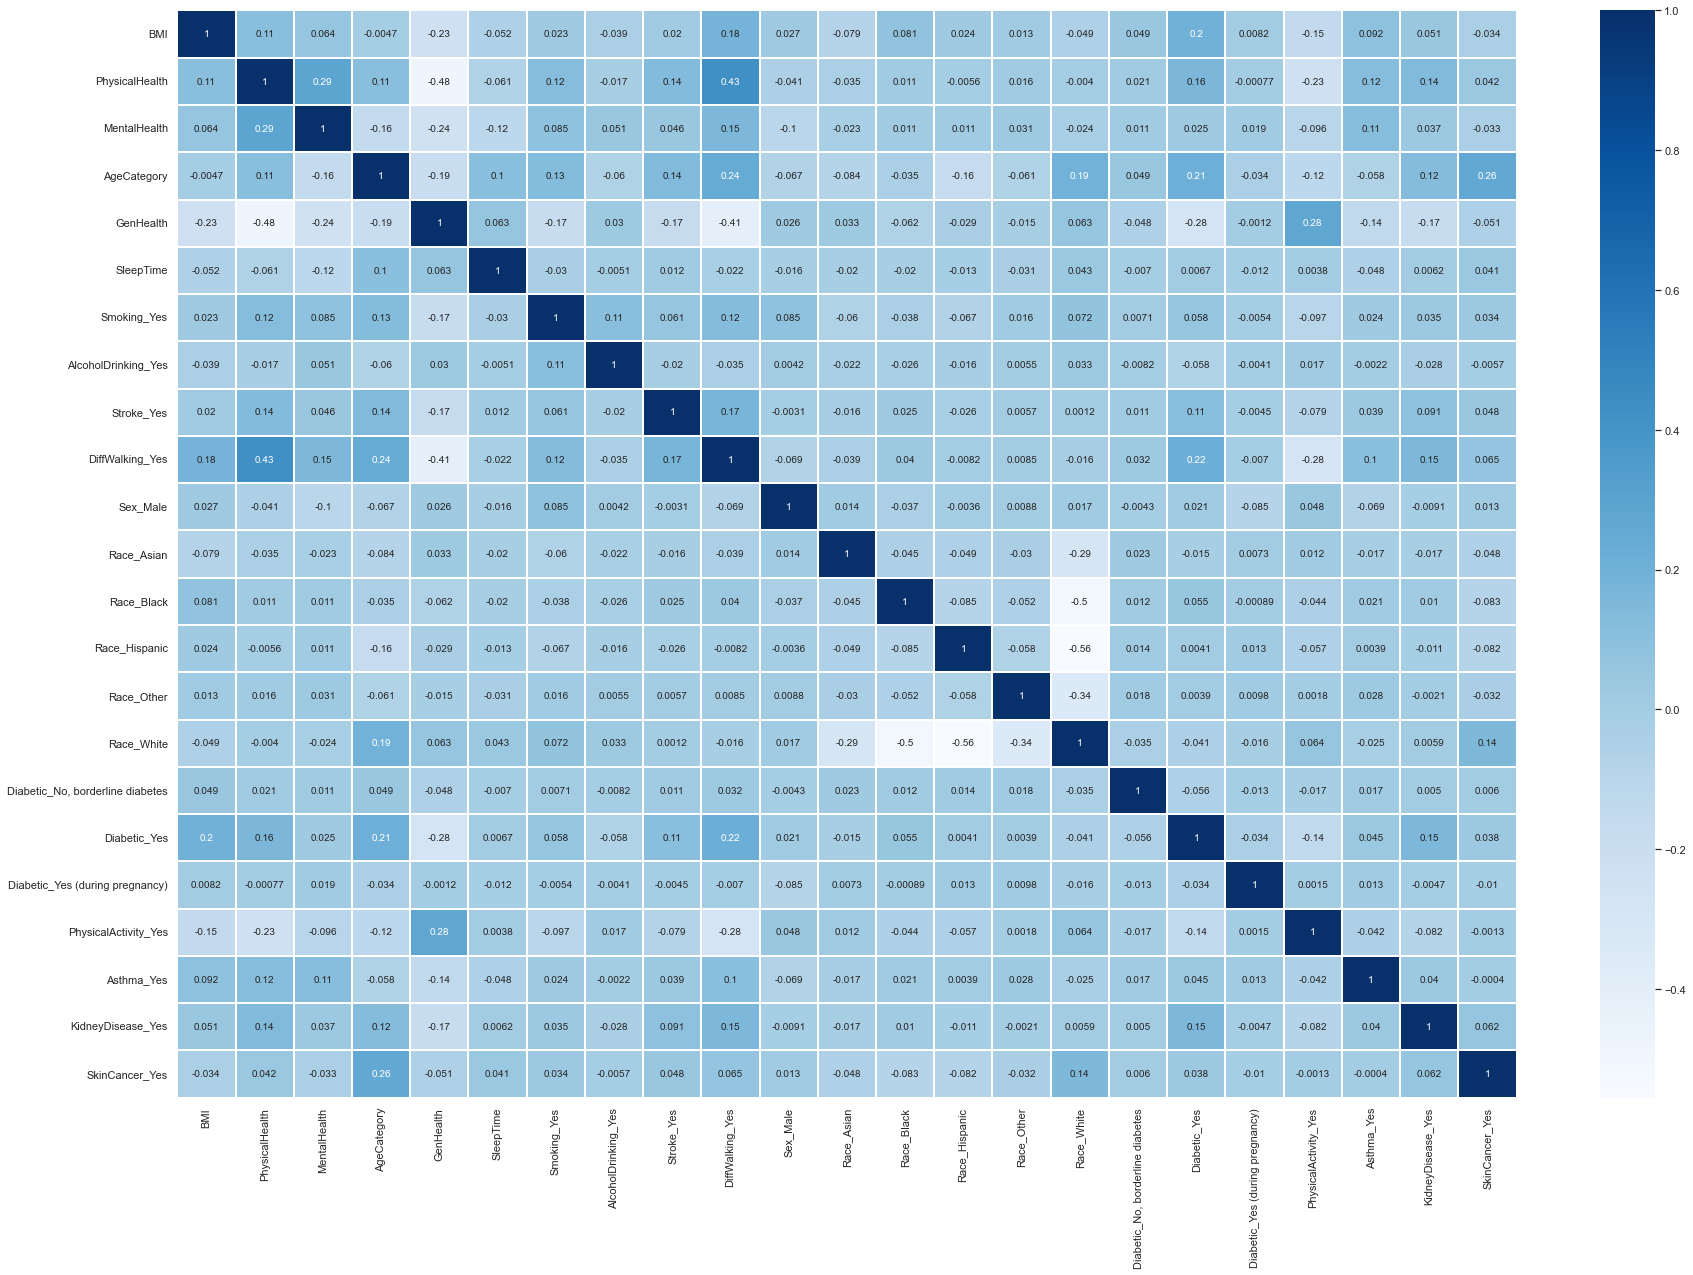

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = encoded_data.corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=2)
plt.show()